Statistical Inferences
===

Motivation
---
How do we decide whether the penny is fair? 

- Toss a penny 100 times and got 32 "Head". Let $X_i$ be the i.i.d.r.v. defined as follows:
$$X_i=\cases{1,\hbox{ with probability $p$ if Head,}\\
             0, \hbox{ with probabiliy $(1-p)$ if Tail,}}$$
   Then 
   $$ Y=X_1+\cdots+X_{100}$$
   and distribted as Bionomial(100,p).

- the experiment here is
   $$ y=x_1+\cdots+x_{100}=32$$
   and note that $p$ is *unknown*.

Question 1
---
What is the $p$ in this experiment?

Experiment got $32/100=0.32$.

Question 2
---
Is $p = 0.5$? Specifically, is the evidence that $p\ne 0.5$. 

Definitely not. But only one experiment taken. Could we rely on the result and satisfy about it? Theirfore we have to make some hypothesis testing: $p\ne0.5$

i.e. maybe $p=0.5$ is right, but we got $\hat p=0.32$ by accident.

Let's estimate the probability of $\hat p=0.32$ considered to be different from the true vale $p=0.5$:

If $Y\sim$  Binomial($n = 100;p = 0.5$), then the probability that $Y$ will deviate from its expected value by at least $|50−32| = 18$ is:

\begin{eqnarray}
{\cal P} &=& {\cal P}(|Y−50|≥18)\\
         &=& {\cal P} (Y\le32 \hbox{ or }Y\ge68) \\
         &=& {\cal P}(Y \le 32) + {\cal P}(Y \ge68)\\
         &=& {\cal P}(Y \le 32)+1−P(Y \le 67)
         &=& 0.00040877716742671
\end{eqnarray}

In [2]:
pbinom(32,100,.5)+1-pbinom(67,100,.5)

[1] 0.0004087772

This gives that
$${\cal P}(p\ne0.5|p=0.5)<<1$$
This significance probability seems fairly small—perhaps small enough to convince that in fact $p\ne 0.5$.

# Question3
---
If $p=0.5$ is un-reasonable, what are plausible values of $p$? 

Suppose that there is a plauiable value, $p_0$, we can estimate as above:
\begin{eqnarray}
{\cal P} &=& {\cal P}(|Y−100p_0|\ge|100p_0-32|)\\
         &=& {\cal P}(Y \le 100p_0-|100p_0-32|)+1−P(Y \le 100p_0+|100p_0-32|)
\end{eqnarray}

We will reject $p_0$ if ${\cal P}<0.1$.

By Central Limit Theorem,

$$\frac{Y−100p_0}{\sqrt{100p_0(1-p_0)}}\sim Z=N(0,1)$$

${\cal P}>0.1$ implies
\begin{eqnarray}
0.1<{\cal P} &=& {\cal P}(|Y−100p_0|\ge|100p_0-32|)\\
         &=& {\cal P} \left( \frac{|Y−100p_0|}{\sqrt{100p_0(1-p_0)}}\ge
              \frac{|100p_0-32|}{\sqrt{100p_0(1-p_0)}} \right)\\
         &=& {\cal P}\left( \left|Z\right|\ge
              \frac{|100p_0-32|}{\sqrt{100p_0(1-p_0)}}\right)\\
\end{eqnarray}


In [3]:
qnorm(0.95)

[1] 1.644854

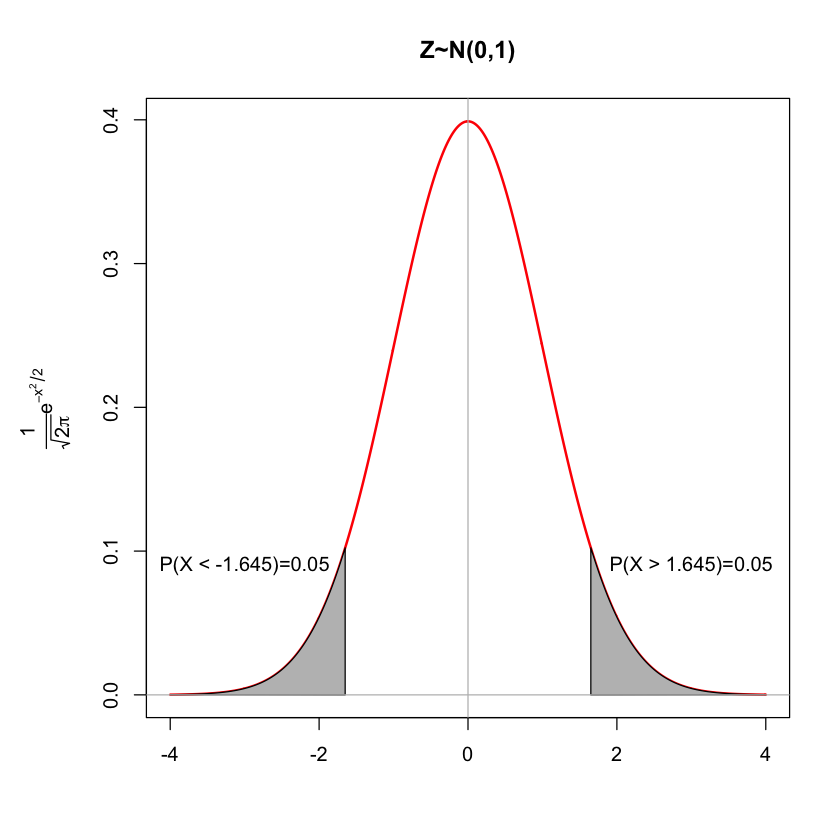

In [4]:
oldpar <- par(mar = c(5, 6, 4, 2) + 0.1) 
mu <- 0; sigma <- 1 
x <- seq(-4, 4, .01) 

fx <-dnorm(x)
plot(x, fx, type = "l", col='red',lwd = 2,xlab="",main="Z~N(0,1)",
        ylab=expression(frac(1,sqrt(2*pi))* e^{-x^2/2})) 

x0 <- x[x >= 1.645]    # define region to fill
x0 <- c(x0[1], x0) ;  fx0 <- fx[x >= 1.645]
fx0 <- c(0, fx0)
text(3,0.09,"P(X > 1.645)=0.05")
polygon(x0, fx0, col="gray")

y0 <- x[x <= -1.645]    # define region to fill
y0 <- c( y0,y0[length(y0)]) ;  fy0 <- fx[x <= -1.645]
fy0 <- c(fy0,0)
text(-3,0.09,"P(X < -1.645)=0.05")
polygon(y0, fy0, col="gray")

abline(h=0, col="gray") ; 
abline(v=0, col="gray")


Since 
$$ {\cal P}(Z\le1.645)=0.95$$
then we have to solve $p_0$ by
$$\frac{100p_0-32}{\sqrt{100p_0(1-p_0)}}=\pm1.645$$

This can be solved by Python as follows:
```python
import scipy.optimize as op
from numpy import sqrt
def f(p):
    return (100*p-32)/sqrt(100*p*(1-p))-C
C=-1.645000
op.fsolve(f,0.1)  
# array([ 0.24887644])
C=1.645000
op.fsolve(f,0.1)
# array([ 0.40060858])
```
which gives the solution for $p_0\in[0.2489,0.401]$. 

Note
---
1.  $p=1/2$ is not in the interval; this also shows the reason why it's not plausible. 
2. if run on Jupyter notebook, just create a new Python code to run above to get the values. 
   <a href="python/p_solve.ipynb">p_solve</a>

Point Estimation
---
Sample mean
  $$ \bar X=\sum_{i=1}^n\frac{X_i}{n}, E \bar X= \frac{1}{n}E \sum_{i=1}^nX_i=\frac{n\mu}{n}=\mu$$
  
  \begin{eqnarray}
  \hbox{variance} &=& E \left( \bar X -\mu \right)^2 \\ 
                  &=& \sum_{i=1}^n \frac{1}{n^2} E  (X_i-\mu)^2
                  &=& \frac{\sigma^2}{n}
\end{eqnarray}

Since 
$$ \hbox{Var} \bar X =  \frac{\sigma^2}{n}\le \sigma^2=\hbox{Var} X_1 $$

the unbiased estimator $\bar X$ has smaller variance than the unbiased estimator $X_1$.

The *Weak Law of Large Numbers* states that 
$$\bar X \to \mu \text{ in probabolity.}$$ 
Thus, as the sample size increases, the estimator $\bar X$ converges in probability to the estimand $\mu$.



Sample Variance
---
Estimation of variance, $\sigma^2$:
$$ \hat{\sigma^2}=\frac{1}{n}\sum_{i=1}^n  E  (X_i-\bar X)^2$$


It's known as biased estimate since:

\begin{eqnarray}
  E \hat{\sigma^2} &=& \frac{1}{n}\sum_{i=1}^n  E  (X_i-\bar X)^2 \\ 
                  &=& \frac{1}{n}\sum_{i=1}^n  E \left(-\frac{1}{n}(X_1-\mu)-\cdot+
                      \frac{n-1}{n}(X_i-\mu)-\cdots-\frac{1}{n}(X_n-\mu)\right)^2  \\ 
                  &=& \frac{1}{n} \cdot\sum_{i=1}^n \frac{(n-1)+(n-1)^2}{n^2}  \sigma^2 \\
                  &=& \frac{n-1}{n}\sigma^2 (\ne \sigma^2)
\end{eqnarray}

It's called biased estimator. 

The following is another popular variance esitmator:

$$ s^2_n=\frac{1}{n-1}\sum_{i=1}^n  (X_i-\bar X)^2$$
since it is unbiased:
$$ E s^2_n= \frac{1}{n-1}\sum_{i=1}^n  E  (X_i-\bar X)^2=\frac{n}{n-1}\cdot \frac{n-1}{n}\cdot\sigma^2=\sigma^2$$

Review
---
1. (Yes or No) Let $\{X_1,\cdots, X_n\}$ are i.i.d $N(0,\sigma^2)$ r.v.'s and 
   $\{Z_1,\cdots, Z_n\}$ are i.i.d $N(0,1)$ r.v.'s. Is the following variables is the same:
   \begin{eqnarray}
    U_X &=&\frac{\bar X}{\sqrt{\frac{1}{n-1}\sum_{i=1}^n  E  (X_i-\bar X)^2}}\\
    U_Z &=&\frac{\bar Z}{\sqrt{\frac{1}{n-1}\sum_{i=1}^n  E  (Z_i-\bar Z)^2}}
   \end{eqnarray}

Answer
---
Yes, $Z_i=X_i/\sigma$.

Observation by R-codes:

In [6]:
sigma2=4
u <- function() {
      x <- rnorm(10, mean = 0, sd = sigma2)
      mean(x) / sd(x)
  }

In [7]:
# 5000 U~X/2
u5000 <- replicate(5000, u())
summary(u5000)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.230000 -0.209500 -0.003054  0.006304  0.218800  3.376000 

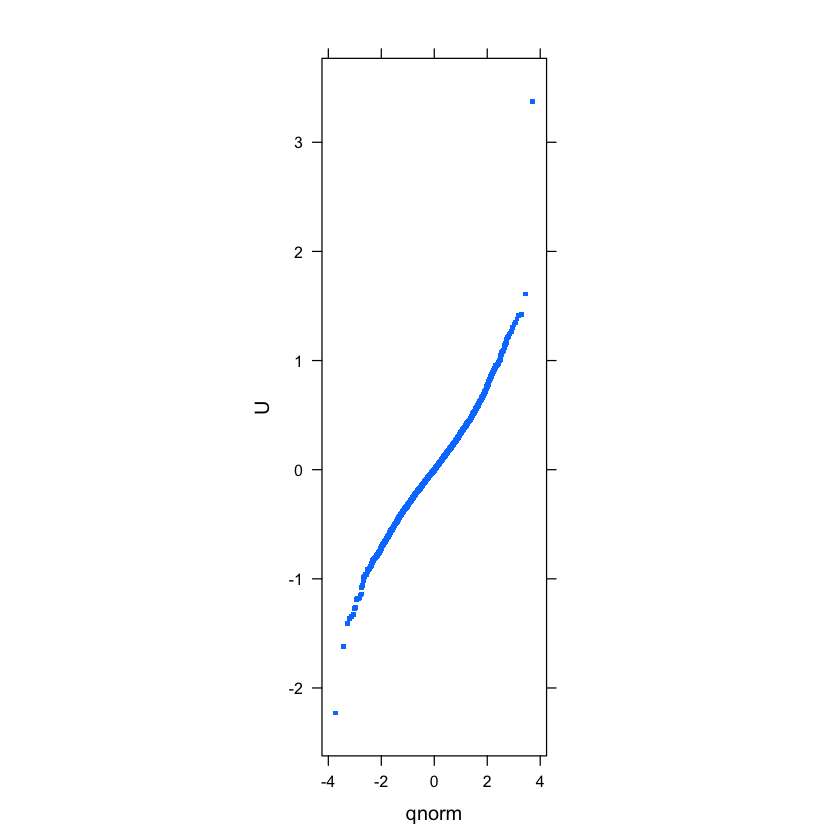

In [8]:
# Draw quantile-Quantile plots of U against N(0,1)

library(lattice)
qqmath(~u5000, distribution = qnorm, aspect = "xy", pch = ".", cex = 4,ylab="U")

Example: Point Estimate of Population 
---
Problem

Find a point estimate of mean university student height with the sample data from survey.

Solution

For convenience, we begin with saving the survey data of student heights in a variable height.survey.
And it's 172.38cm

In [9]:
library(MASS)                  # load the MASS package 
height.survey = survey$Height

In [10]:
cat(sprintf("The estimated average of height is %.3f cm",mean(height.survey, na.rm=TRUE)))  # skip missing values 

The estimated average of height is 172.381 cm

Interval Estimate of Population Mean with Known Variance
---

After we found a point estimate of the population mean, we would need a way to quantify its accuracy. Here, we discuss the case where the population variance $\sigma^2$ is assumed known.

Let us denote the $100(1 −\alpha∕2)$ percentile of the standard normal distribution as $Z_{\alpha∕2}$. For random sample of sufficiently large size, the end points of the interval estimate at $(1 − \alpha)$ confidence level is given as follows:


\begin{eqnarray*}
  1 - \alpha & = & {\cal P} (| Z | \leqslant z_{\alpha / 2})\\
  & = & {\cal P} \left( \left| \frac{\bar{X} -{\mu}}{\sigma /
  \sqrt{n}} \right| \leqslant z_{\alpha / 2} \right)\\
  \Rightarrow &  & \left| \frac{\bar{X} -{\mu}}{\sigma / \sqrt{n}} \right|
  \leqslant z_{\alpha / 2}\\
  \Rightarrow &  & \bar{X} - z_{\alpha / 2} \frac{\sigma}{\sqrt{n}} \leqslant
  {\mu} \leqslant \bar{X} + \frac{\sigma}{\sqrt{n}} z_{\alpha / 2}
\end{eqnarray*}
i.e for random sample of sufficiently large size, the interval estimated at
$(1 - \alpha)$ of sample mean is
$$ \left[ \bar{x} - z_{\alpha / 2} \frac{\sigma}{\sqrt{n}}, \bar{x} +
   z_{\alpha / 2} \frac{\sigma}{\sqrt{n}} \right] $$

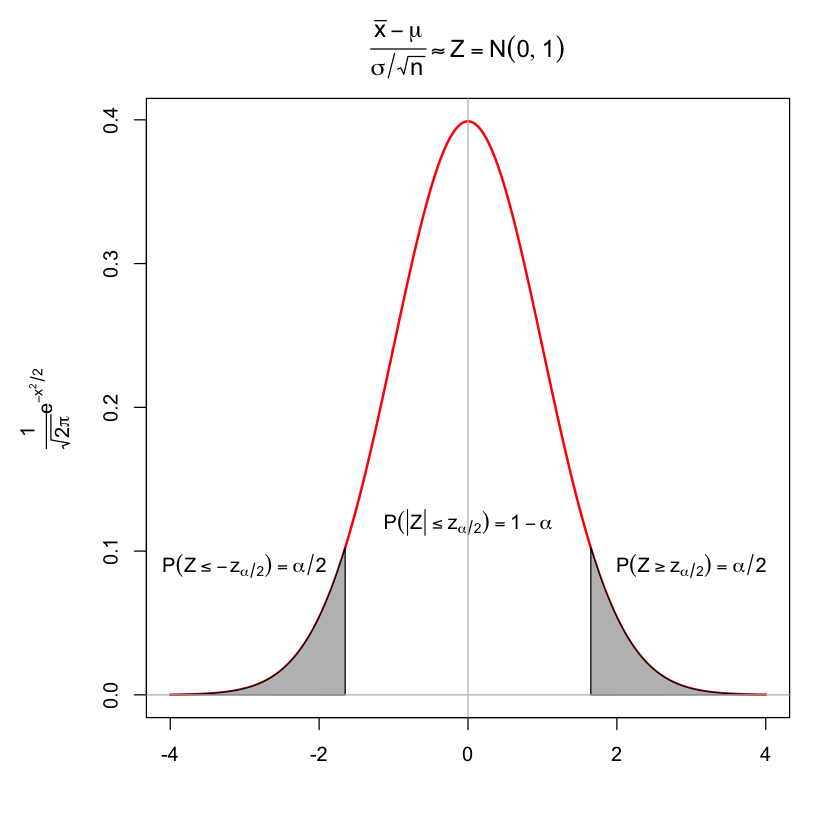

In [11]:
oldpar <- par(mar = c(5, 6, 4, 2) + 0.1) 
mu <- 0; sigma <- 1 
x <- seq(-4, 4, .01) 

fx <-dnorm(x)
plot(x, fx, type = "l", col='red',lwd = 2,xlab="",main=expression(frac(bar(x)-mu,sigma/sqrt(n))%~~%Z==N(0,1)),
        ylab=expression(frac(1,sqrt(2*pi))* e^{-x^2/2})) 

x0 <- x[x >= 1.645]    # define region to fill
x0 <- c(x0[1], x0) ;  fx0 <- fx[x >= 1.645]
fx0 <- c(0, fx0)

text(0,0.12,expression(P(group("|",Z,"|") <= z[alpha/2])==1-alpha))

text(3,0.09,expression(P(Z >= z[alpha/2])==alpha/2))
polygon(x0, fx0, col="gray")



y0 <- x[x <= -1.645]    # define region to fill
y0 <- c( y0,y0[length(y0)]) ;  fy0 <- fx[x <= -1.645]
fy0 <- c(fy0,0)
text(-3,0.09,expression(P(Z <= -z[alpha/2])==alpha/2))
polygon(y0, fy0, col="gray")

abline(h=0, col="gray") ; 
abline(v=0, col="gray")

Problem
---
Assume the population standard deviation $\sigma^2$ of the student height in survey is $9.48^2$. Find the margin of error and interval estimate at 95% confidence level.

**Solution**
We first filter out missing values in survey\$Height with the na.omit function, and save it in height.response.

In [12]:
library(MASS)                  # load the MASS package 
height.response = na.omit(survey$Height)

In [13]:
n = length(height.response) 
sigma = 9.48                   # population standard deviation 
sem = sigma/sqrt(n);       # standard error of the mean 
cat(sprintf("standard error of mean is %.3f ",sem))  

standard error of mean is 0.656 

In [14]:
E = qnorm(.975)*sem
cat(sprintf("margin of error  %.3f ",E))  

margin of error  1.285 

In [15]:
xbar <- mean(height.response)   # sample mean 
I<-xbar + c(-E, E)
cat(sprintf("Estimated interval of sample mean is [%.3f,%.3f] ",I[1],I[2]))  

Estimated interval of sample mean is [171.096,173.666] 

Interval Estimate of Population Mean with Unknown Variance
---

If $\sigma$ is unknown, we have to replace the unknown parameter by some sample value, $s_n$, introduced before:
$$ s^2_n=\frac{1}{n-1}\sum_{i=1}^n  (X_i-\bar X)^2$$
since it is unbiased estimator of $\sigma$.

In [16]:
x <- seq(-4, 4, .1) 
dt(x,df=1)
tail(x,n=1)

[1] 0.01872411 0.01963664 0.02061593 0.02166847 0.02280157 0.02402339
 [7] 0.02534314 0.02677123 0.02831938 0.03000093 0.03183099 0.03382677
[13] 0.03600791 0.03839685 0.04101932 0.04390481 0.04708726 0.05060571
[19] 0.05450512 0.05883732 0.06366198 0.06904770 0.07507309 0.08182773
[25] 0.08941289 0.09794150 0.10753712 0.11833081 0.13045487 0.14403162
[31] 0.15915494 0.17586182 0.19409139 0.21363080 0.23405139 0.25464791
[37] 0.27440507 0.29202742 0.30606720 0.31515830 0.31830989 0.31515830
[43] 0.30606720 0.29202742 0.27440507 0.25464791 0.23405139 0.21363080
[49] 0.19409139 0.17586182 0.15915494 0.14403162 0.13045487 0.11833081
[55] 0.10753712 0.09794150 0.08941289 0.08182773 0.07507309 0.06904770
[61] 0.06366198 0.05883732 0.05450512 0.05060571 0.04708726 0.04390481
[67] 0.04101932 0.03839685 0.03600791 0.03382677 0.03183099 0.03000093
[73] 0.02831938 0.02677123 0.02534314 0.02402339 0.02280157 0.02166847
[79] 0.02061593 0.01963664 0.01872411

[1] 4

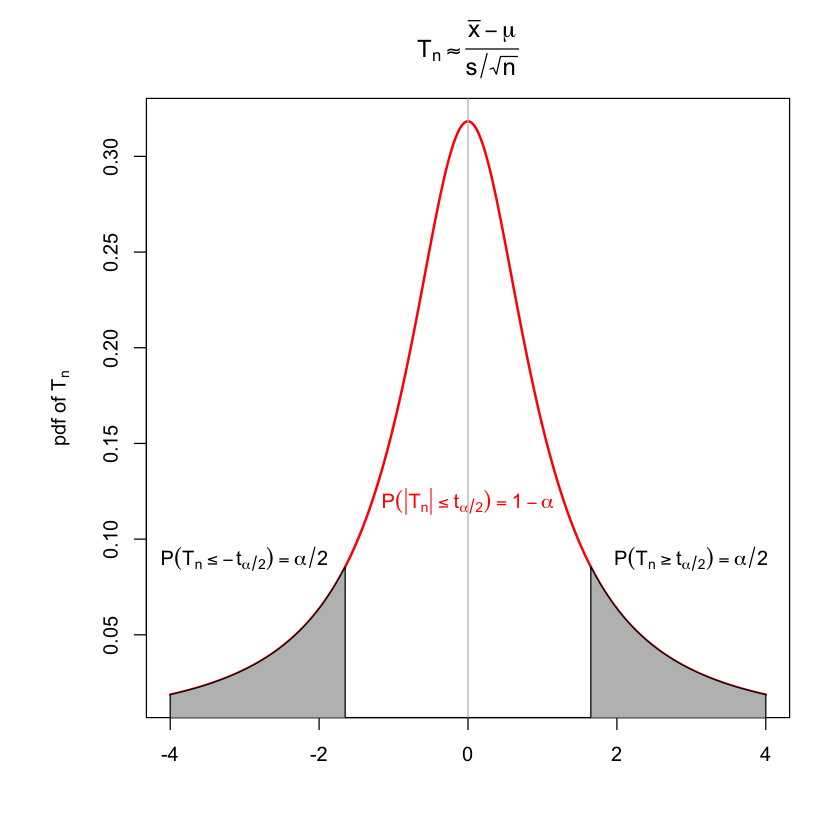

In [31]:
oldpar <- par(mar = c(5, 6, 4, 2) + 0.1) 
mu <- 0; sigma <- 1 
x <- seq(-4, 4, .01) 

fx <-dt(x,df=1)



plot(x, fx, type = "l", col='red',lwd = 2,xlab="",main=expression(T[n]%~~%frac(bar(x)-mu,s/sqrt(n))),
        ylab=expression(paste("pdf of ", T[n]))) 

x0 <- x[x >= 1.645]    # define region to fill
x0 <- c(x0[1], x0,tail(x0,n=1)) ;  fx0 <- fx[x >= 1.645]
fx0 <- c(0, fx0,0)

text(0,0.12,expression(P(group("|",T[n],"|") <= t[alpha/2])==1-alpha),col='red')

text(3,0.09,expression(P(T[n] >= t[alpha/2])==alpha/2))
polygon(x0, fx0, col="gray")



y0 <- x[x <= -1.645]    # define region to fill
y0 <- c( y0[1],y0,y0[length(y0)]) ;  fy0 <- fx[x <= -1.645]
fy0 <- c(0,fy0,0)
text(-3,0.09,expression(P(T[n] <= -t[alpha/2])==alpha/2))
polygon(y0, fy0, col="gray")

abline(h=0, col="gray") ; 
abline(v=0, col="gray")

Facts
---
- $Z\sim N(0,1)\to Z^2\sim \chi^2_1$: i.e square of $N(0,1)$-r.v. is $\chi^2$-square r.v. with degree 1.
- $\{X_i\}^{n}_{i=1}$ i.i.d. $N(0,1)$ r.v.'s $\to$ $X^2=\sum_i^n X_i^2$ is $\chi^2$-square r.v. with degree n ( $E X^2=n$).
- $\{X_i\}^{n}_{i=1}$ i.i.d. $N(\mu,\sigma^2)$ r.v.'s $\to$ $X^2=\sum_i^n (X_i-\mu)^2/\sigma^2$ is $\chi^2$-square r.v. with degree n ( $E X^2=n$).
- $\{X_i\}^{n}_{i=1}$ i.i.d. $N(\mu,\sigma^2)$ r.v.'s $\to$ $(n-1) s_n^2/\sigma^2=\sum_i^n (X_i-\bar X)^2/\sigma^2$ is $\chi^2$-square r.v. with degree $n-1$ ( $E (n-1) s_n^2/\sigma^2=n-1$).
- *student*-r.v. is defined as follows:
  $$ t=\frac{\bar X-\mu}{s_n/\sqrt n}$$
 Note that $$ E s_n^2 = \sigma^2$$
- pdf of $t_n$ is

 $$ f_{T_n}(t)=\frac{\Gamma[(n+1)/2]}{\sqrt{n\pi}\Gamma{[n/2]}}\left( 1+\frac{t^2}{n}\right)^{-(n+1)/2}$$

As case with known varianve:

\begin{eqnarray*}
  1 - \alpha & = & {\cal P} (| T | \leqslant t_{\alpha / 2})\\
  & = & {\cal P} \left( \left| \frac{\bar{X} -{\mu}}{s_n /
  \sqrt{n}} \right| \leqslant t_{\alpha / 2} \right)\\
  \Rightarrow &  & \left| \frac{\bar{X} -{\mu}}{s_n / \sqrt{n}} \right|
  \leqslant t_{\alpha / 2}\\
  \Rightarrow &  & \bar{X} - t_{\alpha / 2} \frac{s_n}{\sqrt{n}} \leqslant
  {\mu} \leqslant \bar{X} + \frac{s_n}{\sqrt{n}} t_{\alpha / 2}
\end{eqnarray*}
i.e for random sample of sufficiently large size, the interval estimated at
$(1 - \alpha)$ of sample mean is
$$ \left[ \bar{x} - t_{\alpha / 2} \frac{s_n}{\sqrt{n}}, \bar{x} +
   t_{\alpha / 2} \frac{s_n}{\sqrt{n}} \right] $$

Problem
---
Without assuming the population standard deviation of the student height in survey, find the margin of error and interval estimate at 95% confidence level.

**Solution**
We first filter out missing values in survey\$Height with the na.omit function, and save it in height.response.

In [18]:
library(MASS)                  # load the MASS package 
height.response = na.omit(survey$Height)

In [19]:
n = length(height.response) 
s = sd(height.response)        # sample standard deviation 
SE = s/sqrt(n);            # standard error estimate 
cat(sprintf("standard error of mean is %.3f ",SE)) 

standard error of mean is 0.681 

In [20]:
E = qt(.975, df=n-1)*SE;     # margin of error 
cat(sprintf("margin of error  %.3f ",E))  

margin of error  1.343 

In [21]:
xbar <- mean(height.response)   # sample mean 
I <- xbar + c(-E, E) 
cat(sprintf("Estimated interval of sample mean is [%.3f,%.3f] ",I[1],I[2]))  

Estimated interval of sample mean is [171.038,173.724] 

Sampling Size of Population Mean
---
The quality of a sample survey can be improved by increasing the sample size. The formula below provide the sample size needed under the requirement of population mean interval estimate at $(1 −\alpha)$ confidence level, margin of error $E$, and population variance $\sigma^2$. Here, $z_{\alpha/2}$ is the $100(1 − \alpha∕2)$ percentile of the standard normal distribution.

\begin{eqnarray*}
  1 - \alpha & = &  {\cal P} \left( \left| \frac{\bar{X} -{\mu}}{\sigma /
  \sqrt{n}} \right| \leqslant z_{\alpha / 2} \right)\\
  \Rightarrow &  & \left| \frac{\bar{x} -{\mu}}{\sigma / \sqrt{n}} \right|
  = z_{\alpha / 2}\\
  \Rightarrow n& = & \frac{z_{\alpha/2}^2\sigma^2}{E^2}
\end{eqnarray*}
where $ E=\bar{X} -{\mu}$



Problem
---
Assume the population standard deviation σ of the student height in survey is 9.48. Find the sample size needed to achieve a 1.2 centimeters margin of error at $95\%$ confidence level.

**Solution**
Since there are two tails of the normal distribution, the 95% confidence level would imply the 97.5th percentile of the normal distribution at the upper tail. Therefore, $z_{\alpha/2}$ is given by qnorm(.975).

In [22]:
zstar <- qnorm(.975) 
sigma <- 9.48 
E <- 1.2 
n<-zstar^2 * sigma^2/ E^2 
cat(sprintf("Approximated sample size of population mean requires %d at least.",ceiling(n)))

Approximated sample size of population mean requires 240 at least.

In [23]:
answer <- function(arg1,arg2){
    cat(sprintf(arg1,arg2))
}

In [27]:
arg1 <- "Approximated size of samples for population mean requires %d at least."
arg2 <- ceiling(n)
answer(arg1,arg2)

Approximated size of samples for population mean requires 240 at least.